In [1]:
import os, sys
sys.path.insert(1, os.getcwd()) 
sys.path.append("..")
import math


In [2]:
import numpy as np
from scipy.signal import cwt
from scipy.signal import ricker as wavelet_ricker
from scipy.signal import argrelextrema


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

In [5]:
import src.uilc as uilc

In [6]:
def ricker(xline, position, weight, rho):
    y= np.zeros(xline.size)
    for i, pos in enumerate(position):
        y += weight[i] * (1- np.power((xline-pos)/rho,2))*np.exp(-np.power(xline-pos,2)/(2* rho**2))
    return y

In [7]:
#FM binarization
def get_period_ds(position, y):
    index =argrelextrema(y, np.greater)
    period = 0
    for i in index:
        if i+1 < len(y):
            period += (position[i+1]- position[i])
    period = period / len(y)
    return period

def get_period_nnls(position, y):
    # Wavelet transform
    # 
    # Get Extrem value from transformed data
    # 
    # Calculate Period
    pass
def get_base_f_ds(position, y):
    return 1/get_period_ds(position, y)

def get_base_f_nnls(position, y):
    return 1/get_period_nnls(position, y)



In [8]:
#Optical system setting
cm = 1E-2
s = 30
W = 9*cm
H = 3*cm

In [9]:
ds_rho, ds_position, ds_F = uilc.DISOP.solve_linear(s, W, H)
ds_lamb = 20*(ds_rho.size) / (W*ds_rho.sum())
ds_rho = ds_lamb * ds_rho
# Normalization
#ds_rho = H**2 *ds_rho 
#width = np.linspace(0.1, 0.5, 20)
#cwtmatr = cwt(ds_rho, wavelet_ricker, width)
#plt.imshow(cwtmatr, extent=[-1, 1, 56, 1], cmap='viridis', aspect='auto',
#           vmax=abs(cwtmatr.max()), vmin=-abs(cwtmatr.max()))


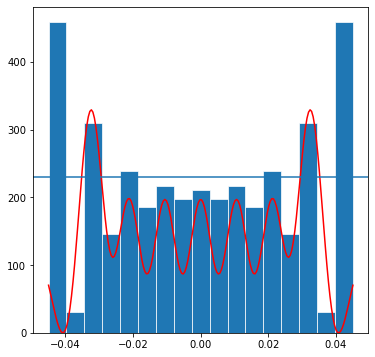

In [10]:
fig_ricker = plt.figure(figsize=(6,6))
ax = fig_ricker.add_subplot()
#marker, stemline, baseline = ax.stem(ds_position, ds_rho)
#marker.set_color('r')
ax.bar(ds_position, ds_rho, width=W/len(ds_rho), edgecolor="white", linewidth=0.7 )
xline = np.linspace(-W/2, W/2, 200)
index = argrelextrema(ds_rho, np.greater)[0]
pos = []
ext = []
rho_i = []
#pos.append(ds_position[0])
for i in index:
    pos.append(ds_position[i])
    ext.append(ds_rho[i])
#pos.append(ds_position[len(ds_position)-1])
rho = ds_rho[2]*np.ones(len(ds_rho))
#rho = ext
y1 = ricker(xline, pos, rho, W/17)
y1 -= y1.min()
ax.plot(xline, y1, 'r')
ax.axhline(ds_rho[0]/2)
plt.show()

In [11]:
ds_rho

array([458.65555977,  30.33699045, 309.33798656, 145.82914206,
       238.66366369, 186.12934365, 216.4807323 , 197.66944516,
       211.57205051, 197.66944516, 216.4807323 , 186.12934365,
       238.66366369, 145.82914206, 309.33798656,  30.33699045,
       458.65555977])

In [12]:
from scipy import fft

In [13]:
sampling_rate = len(ds_rho)/W
Fx = fft.fft(ds_rho)
freq = fft.fftfreq(len(ds_rho)) * sampling_rate

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Hyunseong\AppData\Local\Temp\ipykernel_13944\3452011123.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


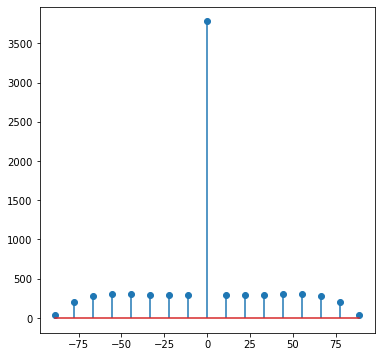

In [14]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
ax.stem(freq, Fx)
fig.show()

c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Hyunseong\AppData\Local\Temp\ipykernel_13944\3427065209.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


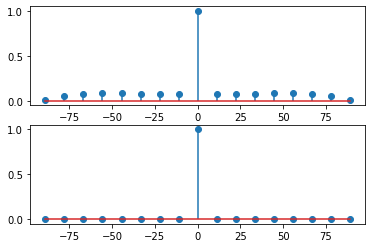

In [15]:
fig, axs = plt.subplots(2)
axs[0].stem(freq, Fx/Fx[0])
f_ones = fft.fft(np.ones(len(Fx)))
axs[1].stem(freq, f_ones/len(Fx))
fig.show()


In [16]:
print(max(f_ones))

(17-0j)


In [17]:
n =100
print(max(fft.fft(np.ones(n))))

(100-0j)


In [18]:
from copy import deepcopy

fx2 = deepcopy(Fx)
scaled = fx2[0]
fx2[0] = 0

print(fft.ifft(fx2))
print("------------")
print(ds_rho)

[ 236.43333755+0.j -191.88523177+0.j   87.11576433+0.j  -76.39308016+0.j
   16.44144147+0.j  -36.09287857+0.j   -5.74148993+0.j  -24.55277706+0.j
  -10.65017172+0.j  -24.55277706+0.j   -5.74148993+0.j  -36.09287857+0.j
   16.44144147+0.j  -76.39308016+0.j   87.11576433+0.j -191.88523177+0.j
  236.43333755+0.j]
------------
[458.65555977  30.33699045 309.33798656 145.82914206 238.66366369
 186.12934365 216.4807323  197.66944516 211.57205051 197.66944516
 216.4807323  186.12934365 238.66366369 145.82914206 309.33798656
  30.33699045 458.65555977]


c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\Hyunseong\miniconda3\envs\uilc\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Hyunseong\AppData\Local\Temp\ipykernel_13944\78738920.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


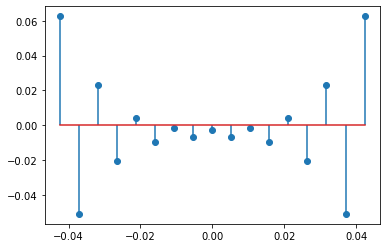

In [19]:
fx = deepcopy(Fx)
fx = fx/fx[0]
fx[0] = 0
fig = plt.figure()
ax = fig.add_subplot()
ax.stem(ds_position, fft.ifft(fx))
fig.show()

## Frequency Modulation

See above weight graph as message signal

Dira Comb Period = Moreno uniform distance for central region
We can assign moutines of sine or cosine signal to diac comb points
Then we can see those  

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_12056\4040308495.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


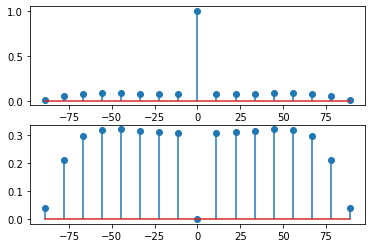

In [65]:
fig, axs = plt.subplots(2)
axs[0].stem(freq, Fx/Fx[0])
axs[1].stem(freq, fft.fft(demodulate))
fig.show()

In [72]:
def func(xline):
    result = complex(0,0)*np.ones(len(xline))
    for f, am in zip(freq, fft.fft(demodulate)):
        result += am*np.cos(2*np.pi*f*xline)
    return result/2

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_12056\4149465751.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


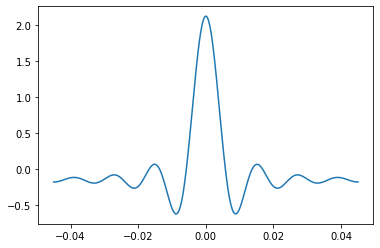

In [73]:
x = np.linspace(-W/2, W/2, 300)
fig = plt.figure()
ax =fig.add_subplot()
ax.plot(x, func(x))
fig.show()

C:\Users\qwqwh\AppData\Local\Temp\ipykernel_12056\2998512624.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


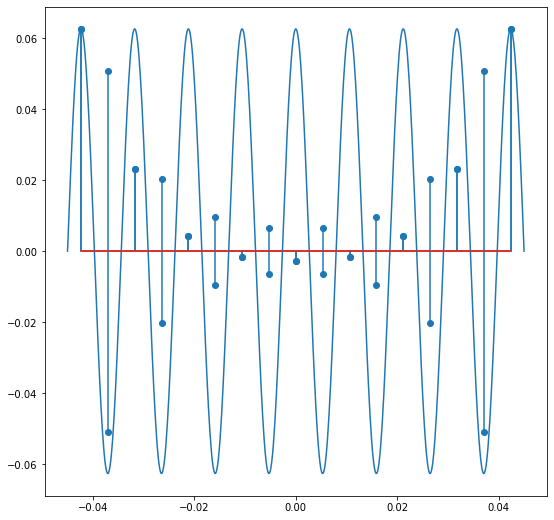

In [55]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot()
ax.stem(ds_position, fft.ifft(fx))
ax.plot(xline, yline)
ax.stem(ds_position, fft.ifft(fx) * pro)
fig.show()

In [20]:
from scipy.interpolate import interp1d


In [26]:

cu2 = interp1d(ds_position, ds_rho, kind='cubic', fill_value="extrapolate")
xew = np.linspace(-(W/2), (W/2), num= 200, endpoint=True)

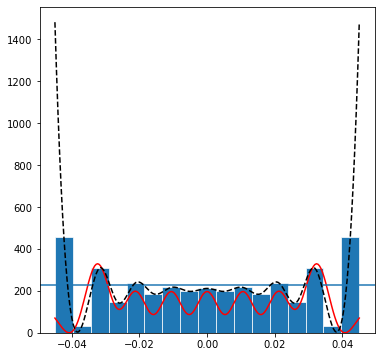

In [27]:
fig_ricker = plt.figure(figsize=(6,6))
ax = fig_ricker.add_subplot()
#marker, stemline, baseline = ax.stem(ds_position, ds_rho)
#marker.set_color('r')
ax.bar(ds_position, ds_rho, width=W/len(ds_rho), edgecolor="white", linewidth=0.7 )
xline = np.linspace(-W/2, W/2, 200)
index = argrelextrema(ds_rho, np.greater)[0]
pos = []
ext = []
rho_i = []
#pos.append(ds_position[0])
for i in index:
    pos.append(ds_position[i])
    ext.append(ds_rho[i])
#pos.append(ds_position[len(ds_position)-1])
rho = ds_rho[2]*np.ones(len(ds_rho))
#rho = ext
y1 = ricker(xline, pos, rho, W/17)
y1 -= y1.min()
ax.plot(xline, y1, 'r')
ax.axhline(ds_rho[0]/2)
ax.plot(xew, cu2(xew), '--', color='black')
plt.show()


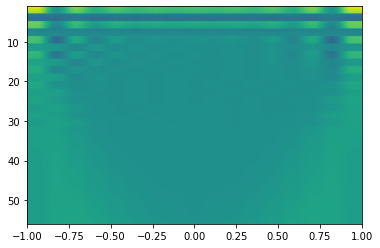

In [11]:
width = np.arange(0.1, 3, 0.005)
cwtmatr = cwt(ds_rho, wavelet_ricker, width)
plt.imshow(cwtmatr, extent=[-1, 1, 56, 1], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr.max()), vmin=-abs(cwtmatr.max()))

In [125]:
W/18

0.005

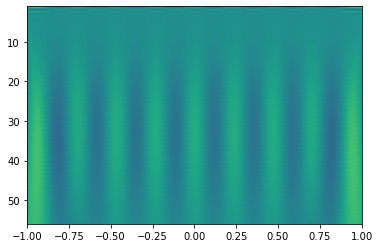

In [126]:
width_y = np.arange(0.1, 10, 0.01)
cwtmatr_y = cwt(y1, wavelet_ricker, width_y)
plt.imshow(cwtmatr_y, extent=[-1, 1, 56, 1], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr.max()), vmin=-abs(cwtmatr.max()))

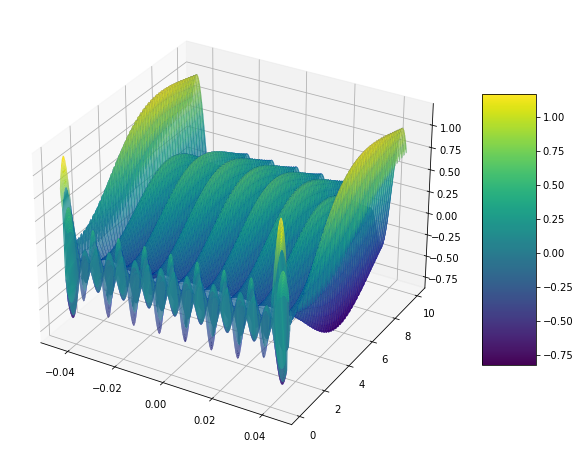

In [127]:
xline = np.linspace(-W/2, W/2, len(y1))
yline = width_y
X, Y = np.meshgrid(xline, yline)
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
sur = ax.plot_surface(X, Y, cwtmatr_y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='b', linewidth=0.01)
fig.colorbar(sur, shrink=0.5, aspect=5)

plt.show()

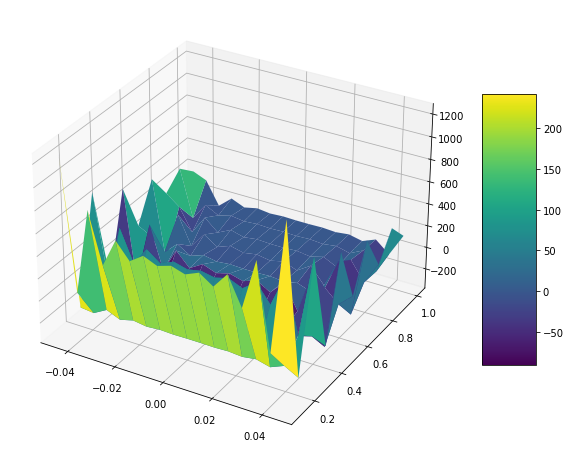

In [35]:
xline = np.linspace(-W/2, W/2, len(ds_rho))
yline = width
X, Y = np.meshgrid(xline, yline)
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
sur = ax.plot_surface(X, Y, cwtmatr, rstride=1, cstride=1,
                cmap='viridis', edgecolor='b', linewidth=0.01)
fig.colorbar(sur, shrink=0.5, aspect=5)

plt.show()

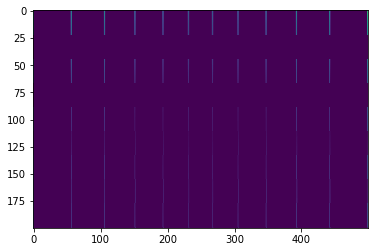

In [53]:
n_nnls = 500
nnls_rho1, nnls_position1, nnls_F = uilc.disop.solve_nnls(s, W, H, n_nnls = n_nnls, mean=False)
widths = np.linspace(0.1, 1, 200)
cwtmatr_nnls = cwt(nnls_rho1, wavelet_ricker, widths)
plt.imshow(cwtmatr_nnls, cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr_nnls).max(), vmin= 0,)

<StemContainer object of 3 artists>

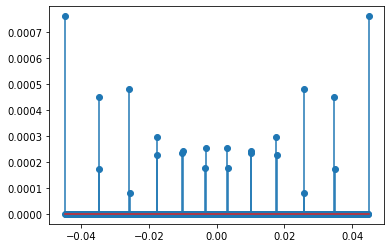

In [54]:
fig = plt.figure()
ax =fig.add_subplot()
ax.stem(nnls_position1, nnls_rho1)

In [55]:
xline = np.linspace(-W/2, W/2, len(nnls_rho1))
yline = widths
X_nnls, Y_nnls = np.meshgrid(xline, yline)


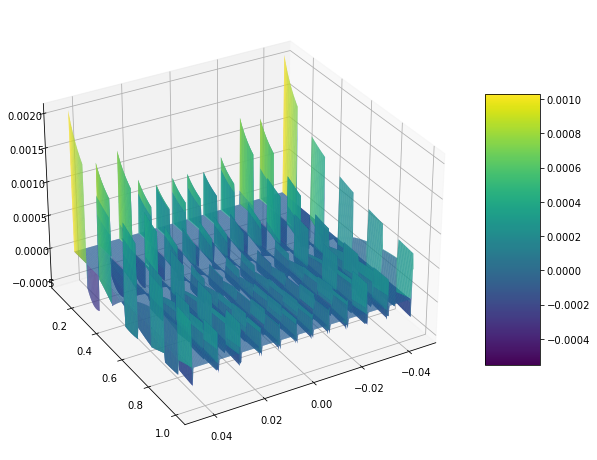

In [56]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
sur = ax.plot_surface(X_nnls, Y_nnls, cwtmatr_nnls, rstride=1, cstride=1,
                cmap='viridis', edgecolor='b', linewidth=0.01)
fig.colorbar(sur, shrink=0.5, aspect=5)
ax.view_init(30, 60)
plt.show()


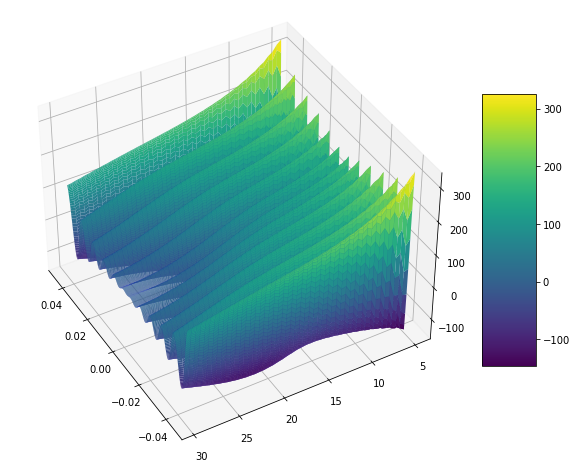